In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!find /content/drive/MyDrive -name "finding_base.py"


/content/drive/MyDrive/פרוייקט עיבוד תמונה/finding_base.py


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/פרוייקט עיבוד תמונה")

In [ ]:
import os

os.listdir("/content/drive/MyDrive/פרוייקט עיבוד תמונה")



['tap_on_parafilm',
 'decyl_on_parafilm',
 '7.12.25 decyl on parafilm',
 '7.12.25 tap on parafilm',
 '16.7.24 decyl on glass',
 '16.7.24 tap on glass',
 '__pycache__',
 'finding_base.py',
 'Untitled0.ipynb']

In [ ]:
import finding_base


In [ ]:
img_path = "/content/drive/MyDrive/פרוייקט עיבוד תמונה/7.12.25 tap on parafilm/frame0000.png"


img, t = finding_base.load_and_crop_image(img_path)
print(img.shape, t)


(400, 1200) 0


### לא להריץ שוב

In [ ]:
import os
import shutil
import re

# Define the base directory where images are located
base_image_dir = "/content/drive/MyDrive/פרוייקט עיבוד תמונה/7.12.25 tap on parafilm"

# 1. Mount Google Drive (already done in the previous cell 'VaJDGzJy7rux')
# You can verify it's mounted by running !ls /content/drive/MyDrive
print("Google Drive is expected to be mounted.")

# 2. Read and sort all frameXXXX.png images by number
image_files = []
if os.path.exists(base_image_dir):
    for filename in os.listdir(base_image_dir):
        if re.match(r"frame\d{4}\.png", filename):
            image_files.append(filename)

    # Sort files numerically based on the frame number
    image_files.sort(key=lambda f: int(re.search(r'\d{4}', f).group()))
    print(f"Found {len(image_files)} image files.")
else:
    print(f"Error: Directory not found at {base_image_dir}")
    image_files = [] # Ensure image_files is empty to prevent further errors


# 3. Select frame0000.png and then every 10th frame
selected_images = []
if image_files:
    # Always include frame0000.png if it exists and is the first after sorting
    if image_files[0] == 'frame0000.png':
        selected_images.append(image_files[0])
        # Select every 10th frame starting from the 10th index (index 9)
        # This effectively gets frame0009, frame0019, etc. if frame0000 is included separately.
        # If we want frame0000, frame0010, frame0020, etc., we need to adjust the logic.
        # Let's assume 'every 10th frame' means 0, 10, 20, ...
        for i in range(1, len(image_files)): # Start from index 1 to avoid re-adding frame0000
            if int(re.search(r'\d{4}', image_files[i]).group()) % 10 == 0:
                selected_images.append(image_files[i])
    else:
        # If frame0000.png is not the first or missing, or if the user means every 10th *from the start*.
        # Let's clarify: 'frame0000.png and then every 10th frame'.
        # This implies frames 0, 10, 20, 30, ...
        for i in range(0, len(image_files)):
            frame_num = int(re.search(r'\d{4}', image_files[i]).group())
            if frame_num % 10 == 0:
                selected_images.append(image_files[i])

    # Remove duplicates if any (in case frame0000 was added by both logic branches)
    selected_images = sorted(list(set(selected_images)), key=lambda f: int(re.search(r'\d{4}', f).group()))

# 4. Create a new folder called "every_10_frames" in the same directory
output_folder_name = "every_10_frames"
output_dir = os.path.join(base_image_dir, output_folder_name)

os.makedirs(output_dir, exist_ok=True)
print(f"Created or ensured existence of output directory: {output_dir}")

# 5. Copy the selected images into the new folder
copied_count = 0
copied_filenames = []
for img_name in selected_images:
    source_path = os.path.join(base_image_dir, img_name)
    destination_path = os.path.join(output_dir, img_name)
    try:
        shutil.copy2(source_path, destination_path)
        copied_count += 1
        copied_filenames.append(img_name)
    except Exception as e:
        print(f"Error copying {img_name}: {e}")

# 6. Print how many images were selected and show a few filenames
print(f"\nSelected and copied {copied_count} images to '{output_dir}'.")
if copied_filenames:
    print("Sample of copied filenames:")
    for filename in copied_filenames[:min(5, len(copied_filenames))]: # Show up to 5 filenames
        print(f"- {filename}")
else:
    print("No images were selected or copied.")


Google Drive is expected to be mounted.
Found 6621 image files.
Created or ensured existence of output directory: /content/drive/MyDrive/פרוייקט עיבוד תמונה/7.12.25 tap on parafilm/every_10_frames

Selected and copied 663 images to '/content/drive/MyDrive/פרוייקט עיבוד תמונה/7.12.25 tap on parafilm/every_10_frames'.
Sample of copied filenames:
- frame0000.png
- frame0010.png
- frame0020.png
- frame0030.png
- frame0040.png


## להמשיך מפה

Calculating mm_per_pixel using frame0000.png...


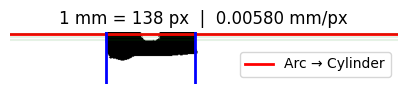


Calculated mm_per_pixel: 0.005797101449275362


In [ ]:


# Define the base directory (from previous steps)
base_image_dir = "/content/drive/MyDrive/פרוייקט עיבוד תמונה/7.12.25 tap on parafilm/every_10_frames"

# 1. Load frame0000.png from the folder
first_image_filename = "frame0000.png"
first_image_path = os.path.join(base_image_dir, first_image_filename)

# Check if the first image exists before proceeding
if not os.path.exists(first_image_path):
    print(f"Error: {first_image_filename} not found at {first_image_path}")
    mm_per_pixel = None # Or handle error appropriately
else:
    # 2. Call an existing function called compute_mm_per_pixel(image_path, plot=False)
    # 3. Store the returned mm_per_pixel value in a variable
    print(f"Calculating mm_per_pixel using {first_image_filename}...")
    mm_per_pixel = finding_base.compute_mm_per_pixel(first_image_path, plot=True)

    # 5. Print the mm_per_pixel value clearly for verification
    if mm_per_pixel is not None:
        print(f"\nCalculated mm_per_pixel: {mm_per_pixel}")
    else:
        print("mm_per_pixel could not be calculated.")

# 4. This single mm_per_pixel value (if calculated) can now be used later for all subsequent image processing.

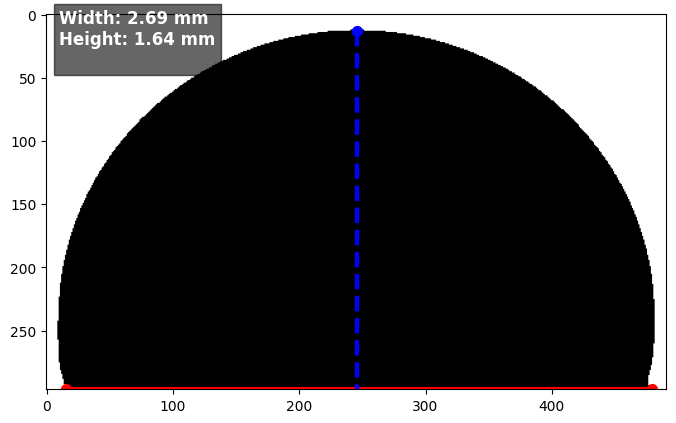

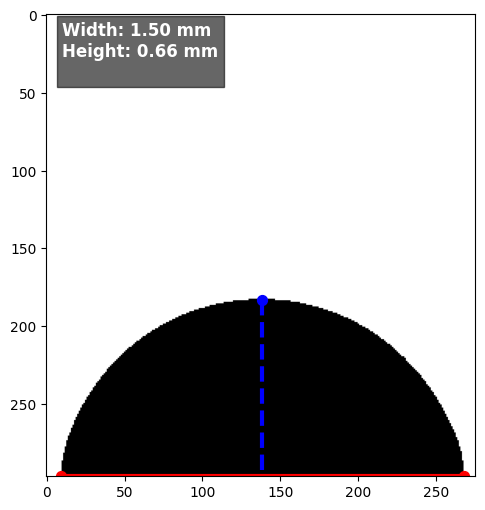

No droplet found in frame6340.png
No droplet found in frame6350.png
No droplet found in frame6360.png
No droplet found in frame6370.png
No droplet found in frame6380.png
No droplet found in frame6390.png
No droplet found in frame6400.png
No droplet found in frame6410.png
No droplet found in frame6420.png
No droplet found in frame6430.png
No droplet found in frame6440.png
No droplet found in frame6450.png
No droplet found in frame6460.png
No droplet found in frame6470.png
No droplet found in frame6480.png
No droplet found in frame6490.png
No droplet found in frame6500.png
No droplet found in frame6510.png
No droplet found in frame6520.png
No droplet found in frame6530.png
No droplet found in frame6540.png
No droplet found in frame6550.png
No droplet found in frame6560.png
No droplet found in frame6570.png
No droplet found in frame6580.png
No droplet found in frame6590.png
No droplet found in frame6600.png
No droplet found in frame6610.png
No droplet found in frame6620.png


,time (s),height_mm,baseline_mm
0,0,1.640580,2.689855
1,10,1.634783,2.689855
2,20,1.634783,2.695652
3,30,1.628986,2.689855
4,40,1.628986,2.689855


In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

rows = []
y_baseline_fixed = None

# loop over the dir

for idx, fname in enumerate(sorted(os.listdir(base_image_dir))):
  image_path = os.path.join(base_image_dir, fname)
  # load and crop
  raw, t = finding_base.load_and_crop_image(image_path)

  #pre processe
  processed = finding_base.blur_and_clahe(raw)
  binary_mask = finding_base.refine_image_by_filling(finding_base.otsu_standard(processed))

  # finding limitis
  y_base, x_left, x_right = finding_base.find_droplet_window(binary_mask)

  # fix the baseline from first frame
  if y_baseline_fixed is None:
    y_baseline_fixed = y_base

  droplet_only = binary_mask[0:int(y_baseline_fixed), int(x_left)-10:int(x_right)+10]

  coords = np.column_stack(np.where(droplet_only == 0))

  if coords.size > 0:
    y_min, x_min_all = coords.min(axis=0)
    y_max, x_max_all = coords.max(axis=0)

    # finding base

    bottom_row_indices = np.where(droplet_only[y_max, :] == 0)[0]
    x_base_start, x_base_end = bottom_row_indices[0], bottom_row_indices[-1]
    width_px = x_base_end - x_base_start

    # finding height
    apex_points = coords[coords[:, 0] == y_min]
    x_apex = int(np.mean(apex_points[:, 1]))
    height_px = y_max - y_min

    height_mm = height_px * mm_per_pixel
    width_mm = width_px * mm_per_pixel

    # store to df
    rows.append({
        "time (s)": t,
        "height_mm": height_mm,
        "baseline_mm": width_mm
    })

    if idx % 500 == 0:
      fig, ax = plt.subplots(figsize=(8,6))
      ax.imshow(droplet_only, cmap='gray')
      ax.hlines(y=y_max, xmin=x_base_start, xmax=x_base_end, color='red', linewidth=3, label='Base')


      ax.vlines(x=x_apex, ymin=y_min, ymax=y_max, color='blue', linewidth=3, linestyle='--', label='Height')


      ax.scatter([x_base_start, x_base_end], [y_max, y_max], color='red', s=50)
      ax.scatter([x_apex], [y_min], color='blue', s=50)

      # הוספת תיבת הטקסט
      result_text = (f"Width: {width_mm:.2f} mm\n"
               f"Height: {height_mm:.2f} mm\n"
               )

      ax.text(10, 40, result_text, color='white', fontsize=12,
        fontweight='bold', bbox=dict(facecolor='black', alpha=0.6))
      plt.show()

  else:
    print(f"No droplet found in {fname}")

df = pd.DataFrame(rows)
df.head()




















In [ ]:
df.shape


(634, 3)

In [ ]:
#  add volume and radius
df["radius_mm"]= df["baseline_mm"]/2
df["volume_ul"]= (np.pi * (df["height_mm"]/6))*(3*(df["radius_mm"]**2)+(df["height_mm"]**2))
df.head()


,time (s),height_mm,baseline_mm,radius_mm,volume_ul
629,6290,0.208696,0.817391,0.408696,0.059515
630,6300,0.202899,0.817391,0.408696,0.057609
631,6310,0.197101,0.811594,0.405797,0.054993
632,6320,0.197101,0.782609,0.391304,0.051416
633,6330,0.185507,0.782609,0.391304,0.047961


In [ ]:
treatment_name = os.path.basename(os.path.dirname(base_image_dir))


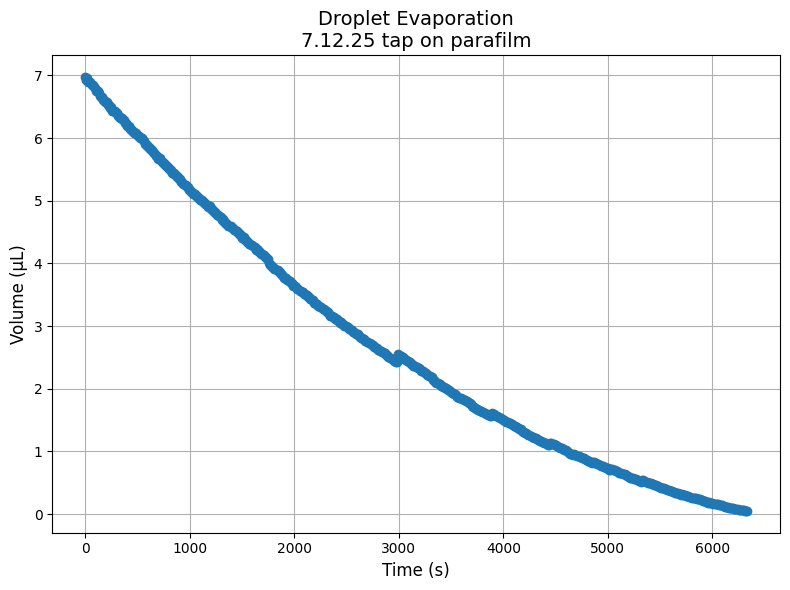

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(
    df["time (s)"],
    df["volume_ul"],
    marker='o',
    linestyle='-'
)

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Volume (µL)", fontsize=12)
plt.title(f"Droplet Evaporation\n{treatment_name}", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()
